In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from Chandra.Time import DateTime
from Ska.Matplotlib import plot_cxctime

In [2]:
from netCDF4 import Dataset

In [3]:
def compare_g13_14_15_proton_rates(times, t_primary, t_secondary, channel):
    fig = plt.figure(figsize=(12, 6))
    
    okp13 = t_primary['satellite'] == 13
    oks13 = t_secondary['satellite'] == 13
    
    okp14 = t_primary['satellite'] == 14
    oks14 = t_secondary['satellite'] == 14
    
    okp15 = t_primary['satellite'] == 15
    oks15 = t_secondary['satellite'] == 15
    
    colname = f"median_{channel}"
    
    # GOES 13
    plot_cxctime(times[okp13], t_primary[colname][okp13], color='moccasin',
                 marker='o', ms='2', linestyle='None', label='G13 primary')
    plot_cxctime(times[oks13], t_secondary[colname][oks13], color='yellow',
                 marker='o', ms='2', linestyle='None', label='G13 secondary')
    # GOES 14
    plot_cxctime(times[okp14], t_primary[colname][okp14], color='indianred',
                 marker='o', ms='2', linestyle='None', label='G14 primary')
    plot_cxctime(times[oks14], t_secondary[colname][oks14], color='salmon',
                 marker='o', ms='2', linestyle='None', label='G14 secondary')
    # GOES 15
    plot_cxctime(times[okp15], t_primary[colname][okp15], color='C0',
                 marker='o', ms='2', linestyle='None', label='G15 primary')
    plot_cxctime(times[oks15], t_secondary[colname][oks15], color='lightblue',
                 marker='o', ms='2', linestyle='None', label='G15 secondary')
    plt.yscale('log')
    plt.legend()
    plt.ylabel('Protons / cm2-s-sr-MeV')

    ax = fig.axes[0]
    plt.text(0.2, 0.7, channel,
             transform=ax.transAxes, fontsize=30, color='k');
    plt.grid()

In [4]:
# GOES primary data between 2015-05-30 and 2020-01-22, daily medians for P4, P5, P6
t_primary = Table.read('goes-2015-05-30-2020-01-22.dat', format='ascii')

# GOES secondary data between 2015-05-30 and 2020-01-22, daily medians for P4, P5, P6
t_secondary = Table.read('goes-secondary-2015-05-30-2020-01-22.dat', format='ascii')

times = DateTime(t_primary['time_mjd'], format='mjd').secs

In [5]:
okp14 = t_primary['satellite'] == 14
oks14 = t_secondary['satellite'] == 14

In [6]:
times = DateTime(t_primary['time_mjd'], format='mjd').secs

In [7]:
path = "/home/malgosia/git/mtanb/g16-hrc-proxy/2017-g14-data/"
file_names = ["g14_epead_p27e_32s_20170910_20170910.nc",
              "g14_epead_p27e_32s_20170911_20170911.nc",
              "g14_epead_p27w_32s_20170910_20170910.nc",
              "g14_epead_p27w_32s_20170911_20170911.nc"]

In [8]:
data = {'times': [],
        'fluxes': []}

In [9]:
for file_name in file_names:
    nc = Dataset(f'{path}/{file_name}', "r", format="NETCDF4")
    data['times'].append(nc.variables['time_tag_cor'])
    if 'P5E_UNCOR_FLUX' in nc.variables.keys():
        data['fluxes'].append(nc.variables['P5E_UNCOR_FLUX'])
    if 'P5W_UNCOR_FLUX' in nc.variables.keys():
        data['fluxes'].append(nc.variables['P5W_UNCOR_FLUX'])

In [10]:
nc.variables['time_tag']

<class 'netCDF4._netCDF4.Variable'>
float64 time_tag(record)
    long_name: Date and time for each observation (end-time of accumulation as stamped by spacecraft)
    units: milliseconds since 1970-01-01 00:00:00.0 UTC
    calendar: Gregorian
unlimited dimensions: record
current shape = (2636,)
filling off

In [11]:
nc.variables['P5W_UNCOR_FLUX']

<class 'netCDF4._netCDF4.Variable'>
float32 P5W_UNCOR_FLUX(record)
    description: Average flux of 63.1 MeV protons from the A detector that faces either East or West depending on the yaw flip of the satellite with no correction applied to remove higher-energy proton contamination 
    long_label: protons-5-A(63.1 MeV) flux
    short_label: p5A fx
    plot_label: p5A(63.1 MeV)
    lin_log: log
    units: p/(cm^2 s sr MeV)
    format: E10.4
    nominal_min: 0
    nominal_max: 1.0e5
    missing_value: -99999
unlimited dimensions: record
current shape = (2636,)
filling off

In [12]:
tab = Table(data)

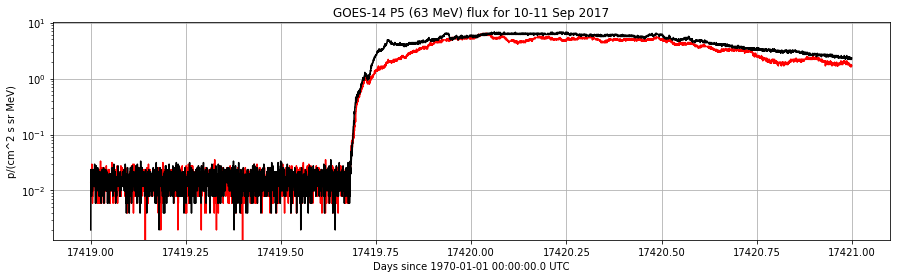

In [13]:
plt.figure(figsize=(15, 4))

for tt, cc in zip(tab, ('r', 'r', 'k', 'k')):
    plt.plot(np.array(tt['times']) / (24 * 60 * 60 * 1000), tt['fluxes'], color=cc)

plt.yscale('log')
plt.xlabel('Days since 1970-01-01 00:00:00.0 UTC')
plt.ylabel('p/(cm^2 s sr MeV)')
plt.title('GOES-14 P5 (63 MeV) flux for 10-11 Sep 2017')
plt.grid();

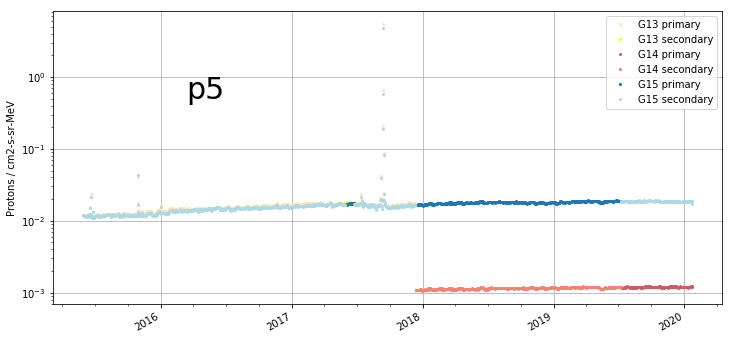

In [14]:
compare_g13_14_15_proton_rates(times, t_primary, t_secondary, 'p5')

__Figure:__ Daily medians plotted based on the pre-GOES-16 data used previously to compute the HRC proxy. G14 rates in the quiet time period, starting the end of 2017, are at the level of 10^-3 p / cm^2-s-sr-MeV rather than 10^-2 p / cm^2-s-sr-MeV as in the data files sent by Linda for the time period preceding the flare (10-Sep-2017). There must be a calibration issue to account for this ~order of magnitude difference that we still do not understand.